# Credit Card Fraud Detection

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import itertools

## Importing the dataset

In [2]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the discrepencies in the data and performing exploratory data analysis

In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
len(df)

284807

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking the distribution of data

In [7]:
df['Class'].value_counts()
# Clearly Imbalanced
# Biased towards Class 0

0    284315
1       492
Name: Class, dtype: int64

### Dropping the useless columns

In [8]:
# Time Column is clearly useless
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling `Amount` feature for better results

In [9]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Cleaning the dataset by removing any `NaN` or `infinite` values

In [10]:
df.dropna(inplace=True)
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep].astype(np.float64)

C:\Users\Vidit\AppData\Local\Temp\ipykernel_1704\77782282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


### Checking the Distribution of various features of our dataset

## Preparing the dataset for training

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

170884

### Creating artificial data using `SMOTE` (Since the dataset is imbalanced)

In [13]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0.0: 170580, 1.0: 304})
After performing smote :  Counter({0.0: 170580, 1.0: 170580})


## Utility Functions

In [14]:
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                    "precision": model_precision,
                    "recall": model_recall,
                    "f1": model_f1}
    return model_results

In [15]:
def make_confusion_matrix(y_true, y_pred, figsize=(10, 10), text_size=15, norm=False): 
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)
    
    labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes), 
            yticks=np.arange(n_classes), 
            xticklabels=labels, 
            yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

## Testing various models on the dataset

### 1.1. Logistic Regression without artificial data

In [16]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

0.9991748812794606

#### Confusion Matrix

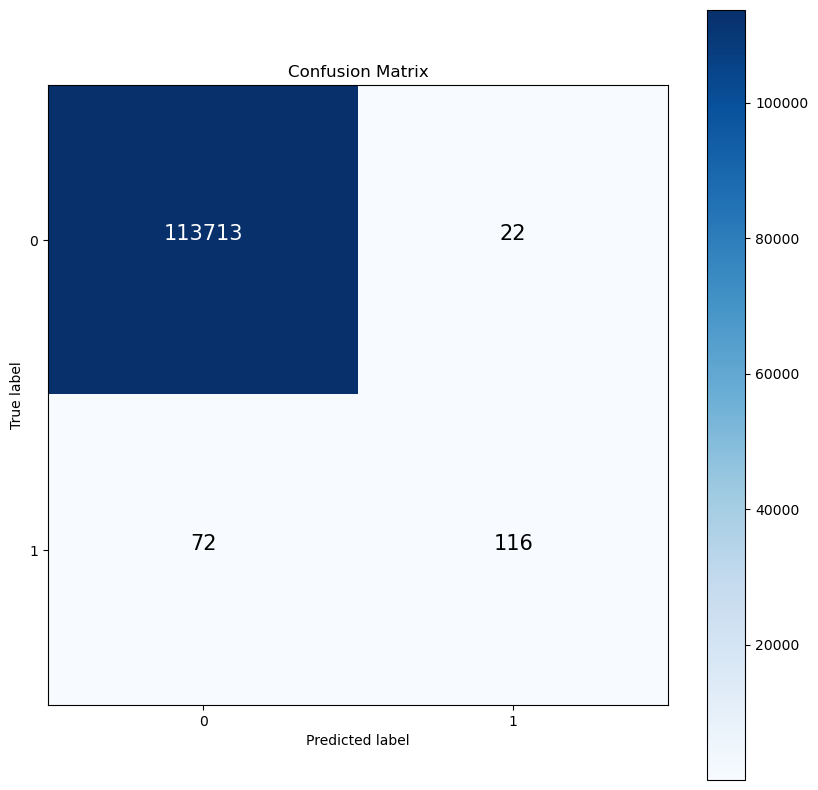

In [17]:
make_confusion_matrix(y_test, y_pred_ws_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [18]:
res11 = calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.91748812794606,
 'precision': 0.999105190559623,
 'recall': 0.9991748812794606,
 'f1': 0.9991116959683756}

### 1.2 Logistic Regression with artificial data

In [19]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9725867471888907

#### Confusion Matrix

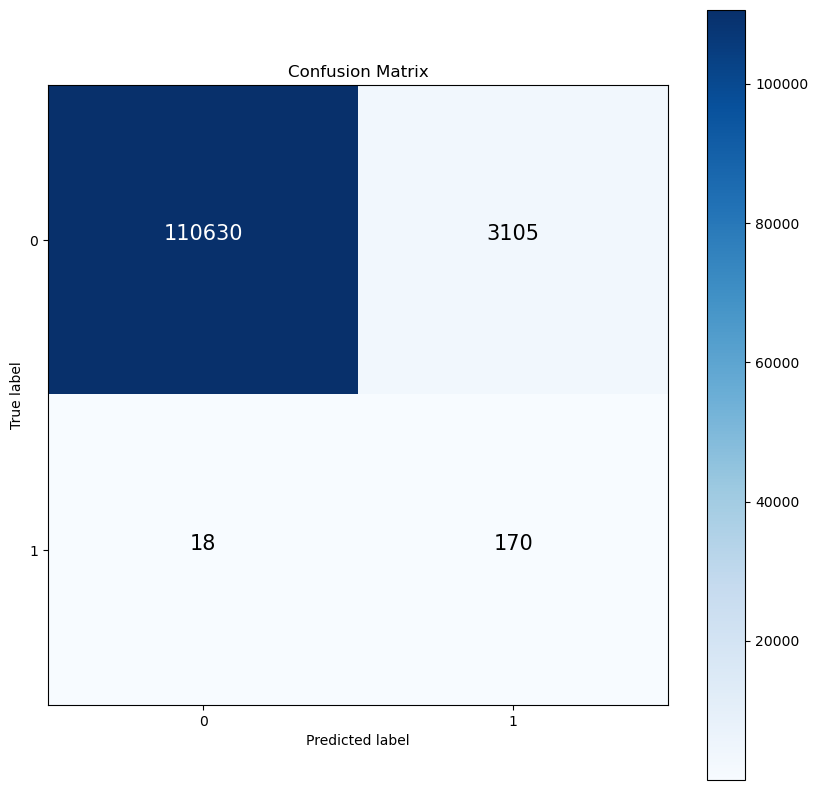

In [20]:
make_confusion_matrix(y_test, y_pred_s_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [21]:
res12 = calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 97.25867471888907,
 'precision': 0.9982730141543855,
 'recall': 0.9725867471888907,
 'f1': 0.9846165857122426}

### 2.1. Decision Tree Classifier without artificial data

In [22]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.9995084399111681

#### Confusion Matrix

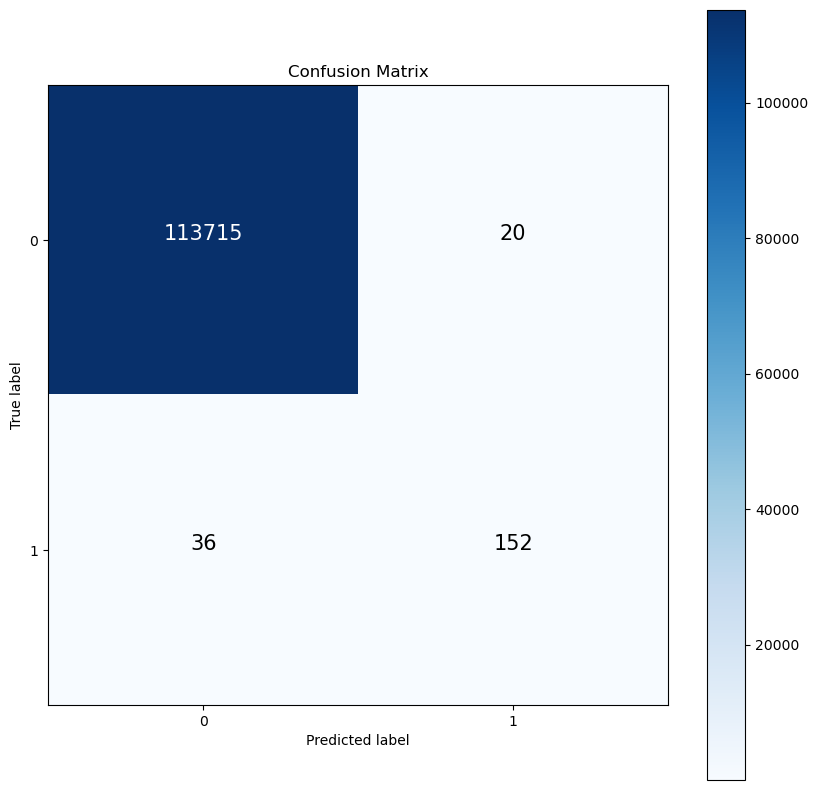

In [23]:
make_confusion_matrix(y_test, y_pred_ws_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [24]:
res21 = calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.95084399111681,
 'precision': 0.9994921534595776,
 'recall': 0.9995084399111681,
 'f1': 0.9994975336403317}

### 2.2. Decision Tree Classifier with artificial data

In [25]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9724375235904953

#### Confusion Matrix

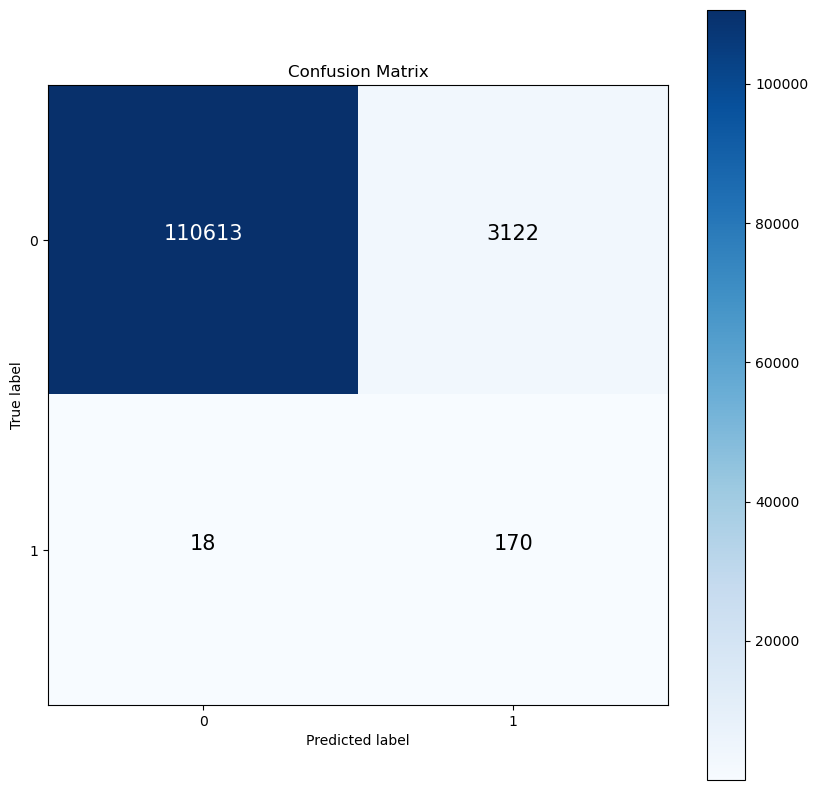

In [26]:
make_confusion_matrix(y_test, y_pred_s_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [27]:
res22 = calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 97.24375235904952,
 'precision': 0.9982725468406333,
 'recall': 0.9724375235904953,
 'f1': 0.9845390973824639}

### 3.1. Naive Bayes Classifier without artificial data

In [28]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9781694653406248

#### Confusion Matrix

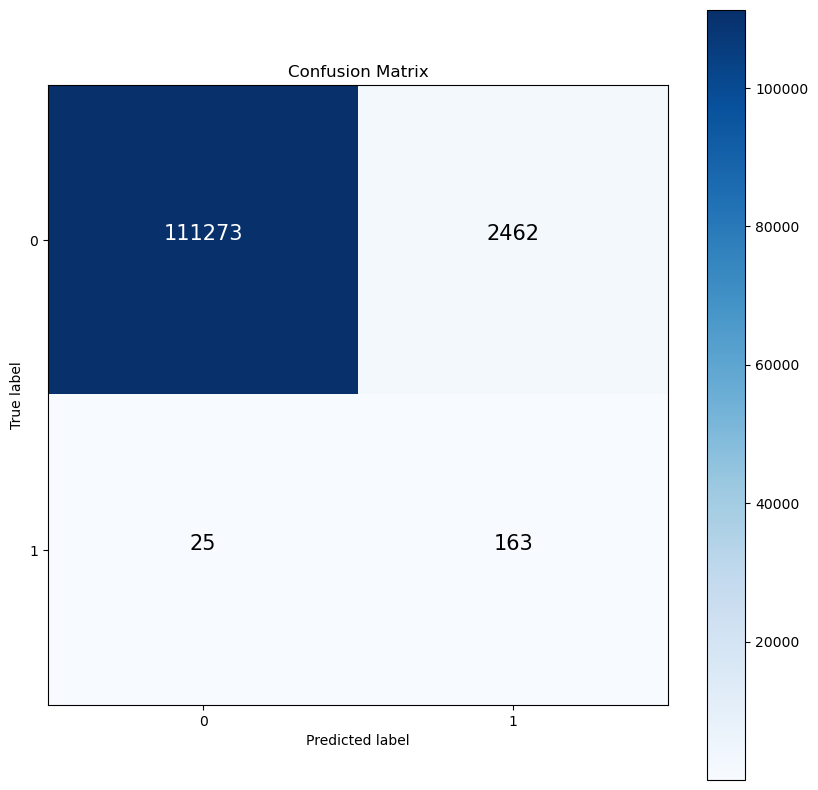

In [29]:
make_confusion_matrix(y_test, y_pred_ws_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [30]:
res31 = calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.81694653406248,
 'precision': 0.9982279829401954,
 'recall': 0.9781694653406248,
 'f1': 0.9875075349489767}

### 3.2. Naive Bayes Classifier with artificial data

In [31]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9756502198853612

#### Confusion Matrix

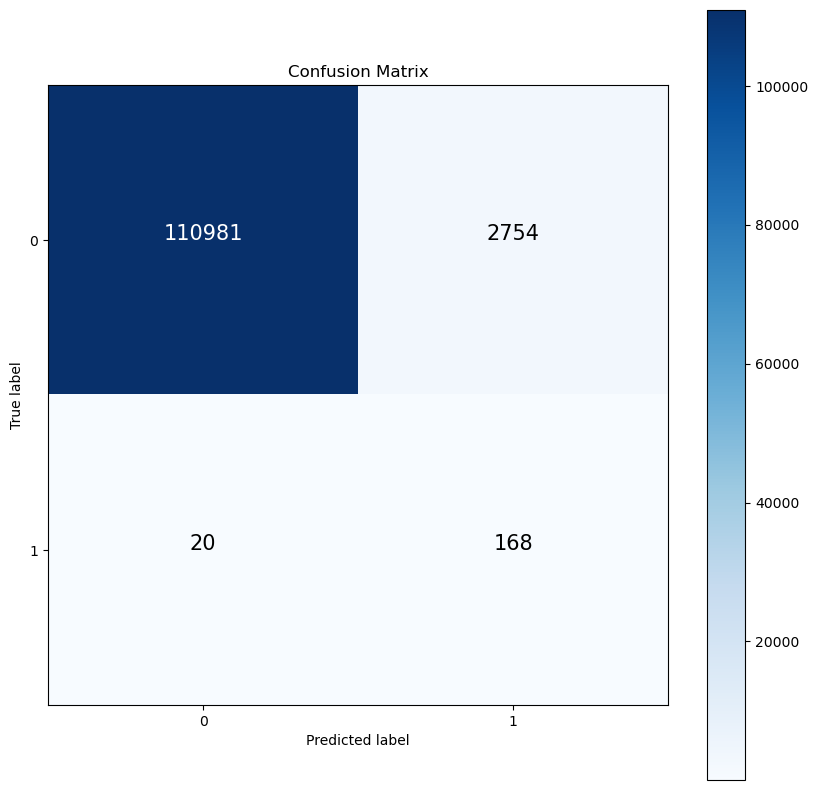

In [32]:
make_confusion_matrix(y_test, y_pred_s_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [33]:
res32 = calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.56502198853612,
 'precision': 0.9982647615207894,
 'recall': 0.9756502198853612,
 'f1': 0.9862050495931302}

### 4.1. K Nearest Neighbors Classifier without artificial data

In [34]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9996225520746469

#### Confusion Matrix

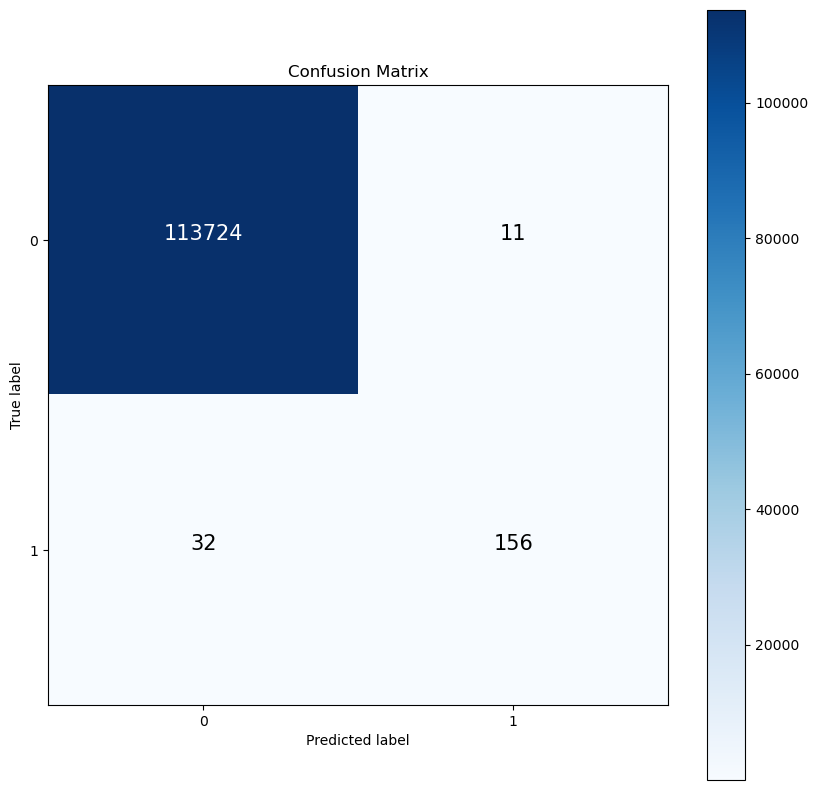

In [35]:
make_confusion_matrix(y_test, y_pred_ws_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [36]:
res41 = calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.9622552074647,
 'precision': 0.9996104621002588,
 'recall': 0.9996225520746469,
 'f1': 0.999611405543288}

### 4.2. K Nearest Neighbors Classifier with artificial data

In [37]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9984199854287545

#### Confusion Matrix

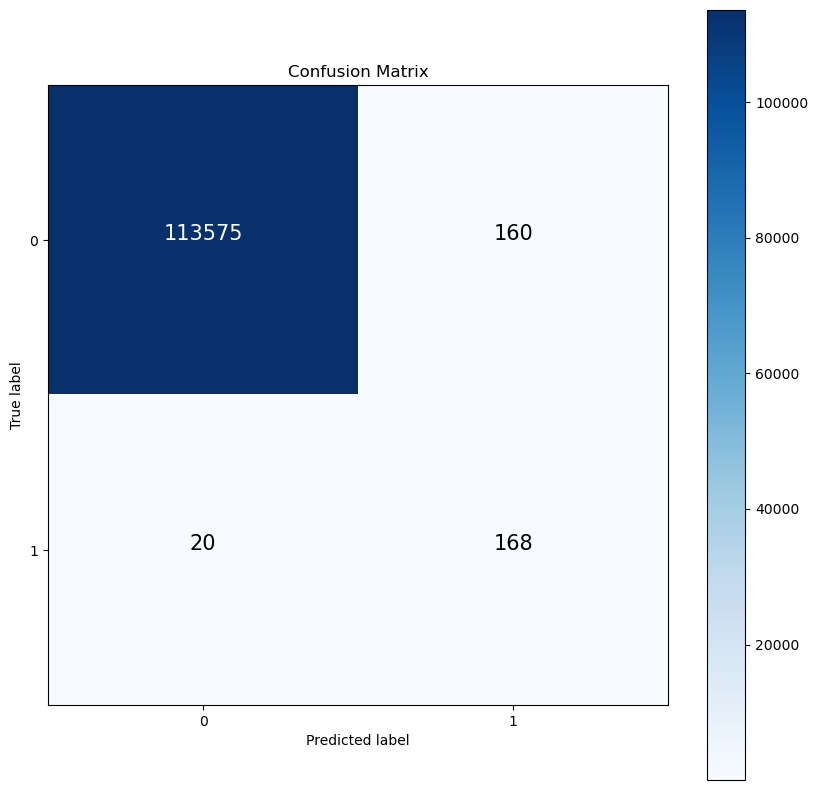

In [38]:
make_confusion_matrix(y_test, y_pred_s_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [39]:
res42 = calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.84199854287546,
 'precision': 0.9990192325865243,
 'recall': 0.9984199854287545,
 'f1': 0.9986338419688608}

### 5.1. Random Forest Classifier without artificial data

In [40]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9995698849222721

#### Confusion Matrix

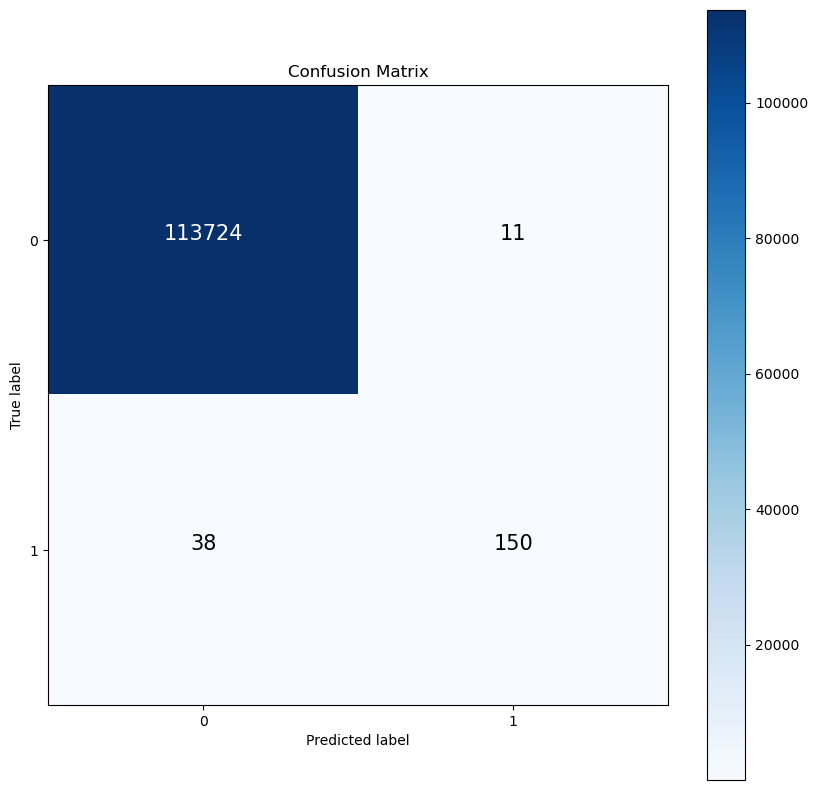

In [41]:
make_confusion_matrix(y_test, y_pred_ws_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [42]:
res51 = calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.95698849222721,
 'precision': 0.9995537713923606,
 'recall': 0.9995698849222721,
 'f1': 0.9995532727566678}

### 5.2. Random Forest Classifier with artificial data

In [43]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9945665054466614

#### Confusion Matrix

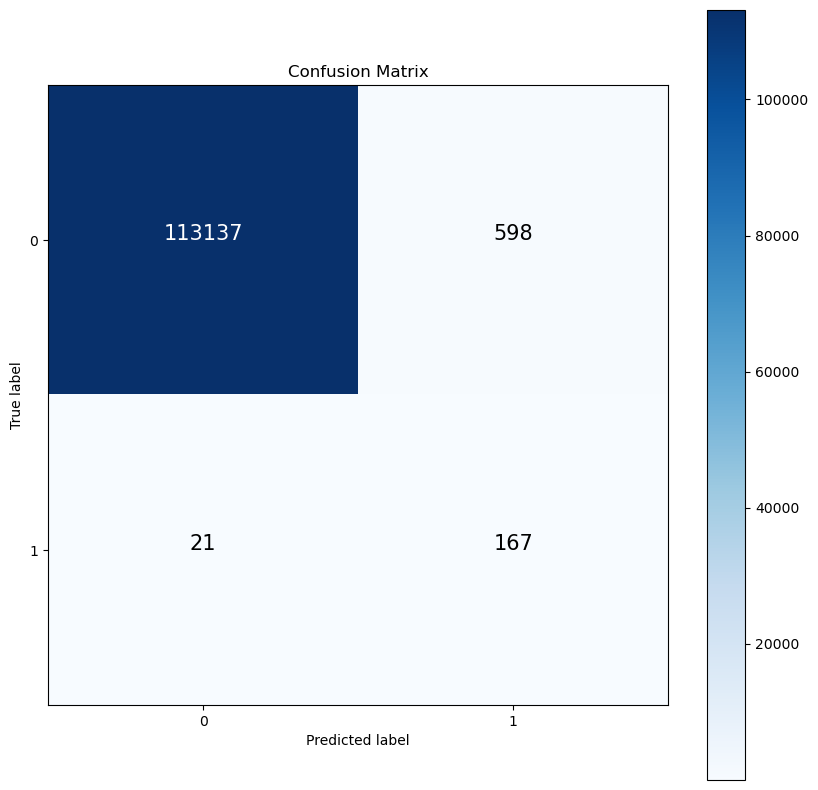

In [44]:
make_confusion_matrix(y_test, y_pred_s_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [45]:
res52 = calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.45665054466613,
 'precision': 0.9985247355012623,
 'recall': 0.9945665054466614,
 'f1': 0.9962044687960759}

# Comparing precision, accuracy f1 score and recall of all the models

In [46]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2'])

In [47]:
dp

,accuracy,precision,recall,f1
1.1,99.917488,0.999105,0.999175,0.999112
1.2,97.258675,0.998273,0.972587,0.984617
2.1,99.950844,0.999492,0.999508,0.999498
2.2,97.243752,0.998273,0.972438,0.984539
3.1,97.816947,0.998228,0.978169,0.987508
3.2,97.565022,0.998265,0.975650,0.986205
4.1,99.962255,0.999610,0.999623,0.999611
4.2,99.841999,0.999019,0.998420,0.998634
5.1,99.956988,0.999554,0.999570,0.999553
5.2,99.456651,0.998525,0.994567,0.996204
